In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2024-06-19 10:58:08.165167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

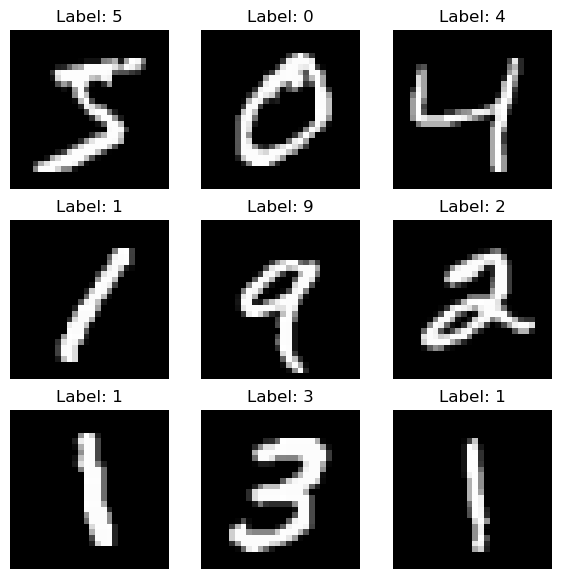

In [4]:
# Reshape the data to 28x28 images
images = X_train.reshape(-1, 28, 28)

# Plot the first 9 images
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


In [5]:
# unravelled row by row
def step_over_image(image, label):
    cnt = 0
    list_of_subimages = []
    subimage_labels = []
    for i in range(24):
        for j in range(24):
            patches = image[i:i+5, j:j+5]
            if np.sum(patches) != 0:
                patches_reshaped = [item for sublist in patches for item in sublist] # flatten the patch
                list_of_subimages.append(patches_reshaped)
                subimage_labels.append(label)
                cnt += 1
    return list_of_subimages, subimage_labels, cnt

X = []
y = []
total_cnt = 0
for i in range(X_train.shape[0]):
    a, b, c = step_over_image(X_train[i], y_train[i])
    X.extend(a)
    y.extend(b)
    total_cnt += c
xnp = np.array(X)
ynp = np.array(y)
print(len(X))
print(f'count: {total_cnt}')
# SAVVE THE GENERATED subimages
np.savetxt('subimage.txt', xnp)

20074704
count: 314


In [6]:
np.savetxt('image_patches.txt', xnp)
np.savetxt('labels.txt', ynp)

In [8]:
from sklearn.cluster import KMeans
import pickle

k = 100
rand_state = 42
#  too slow
kmeans100 = KMeans(n_clusters=k, random_state=rand_state)
kmeans100.fit(xnp)

centers = kmeans100.cluster_centers_
labels = kmeans100.labels_

with open("kmeans_euclidean.pkl", "wb") as f:
    pickle.dump(kmeans100, f)

In [17]:
k = 10000
rand_state = 42

kmeans10000 = KMeans(n_clusters=k, random_state=rand_state)
kmeans10000.fit(xnp)

centers = kmeans10000.cluster_centers_
labels = kmeans10000.labels_

KeyboardInterrupt: 

In [1]:
# TRY COSINE DISTANCE OF IMAGES PATCHES
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances_argmin_min

class CosineKMeans:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = np.zeros(n_clusters)
        self.labels_ = None
        self.inertia_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.cluster_centers_ = X[initial_indices]

        for i in range(self.max_iter):
            print(np.isnan(self.cluster_centers_).any(), np.isnan(X).any())
            self.labels_, distances = pairwise_distances_argmin_min(X, self.cluster_centers_, metric='cosine')
            new_centers = np.array([X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])

            if np.allclose(self.cluster_centers_, new_centers, atol=self.tol):
                break

            self.cluster_centers_ = new_centers

        self.inertia_ = np.sum(distances ** 2)

    def predict(self, X):
        labels, _ = pairwise_distances_argmin_min(X, self.cluster_centers_, metric='cosine')
        return labels


/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [102]:
k = 100
rand_state = 42
cosine_kmeans_100 = CosineKMeans(n_clusters=k, random_state=rand_state)
cosine_kmeans_100.fit(xnp)

False False


: 

In [16]:
k = 10000
rand_state = 42
cosine_kmeans_10000 = CosineKMeans(n_clusters=k, random_state=rand_state)
cosine_kmeans_10000.fit(xnp)

False False


KeyboardInterrupt: 

In [ ]:
# LOAD DATA
np.loadtxt('subimage.txt', xnp)

In [ ]:
# LOAD A MODEL
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

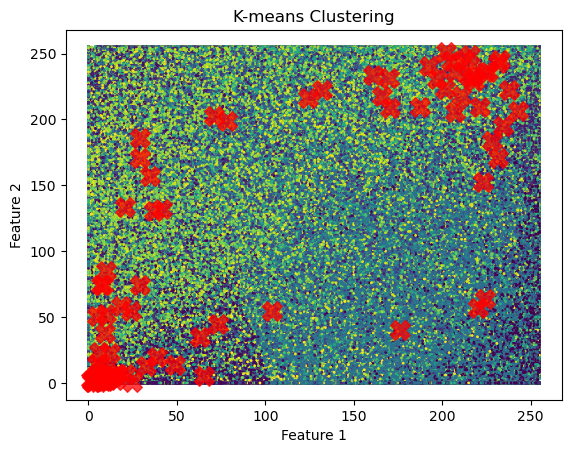

In [9]:
x_l1 = []
y_l1 = []
for i in range(len(ynp)):
    if (ynp[i] == 1):
        x_l1.append(xnp[i])
        y_l1.append(ynp[i])
plt.scatter(xnp[:,0], xnp[:,1], c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()